In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sn
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
sales =pd.read_csv('sales.csv')
sales.head(5)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [3]:
# check statistics
sales.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [4]:
sales.shape

(640840, 10)

In [5]:
# check the data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [6]:
filtered_sales = sales[(sales['open'] == 0) & (sales['nb_customers_on_day'] != 0)]
filtered_sales.head(10)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales


In [7]:
# # Filter the data to keep only the days when the store is open
# sales = sales[sales['open'] == 1]


# # Remove the 'open' column
# sales.drop(columns=['open'], inplace=True)

In [8]:
# Drop the Unnamed column
sales.drop(columns=['Unnamed: 0'], inplace=True)
sales

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...
640835,409,6,2013-10-26,483,1,0,0,0,4553
640836,97,1,2014-04-14,987,1,1,0,0,12307
640837,987,1,2014-07-07,925,1,0,0,0,6800
640838,1084,4,2014-06-12,725,1,0,0,0,5344


In [9]:
# Define the function to assign values to the is_holiday column
def is_holiday(row):
    if row['state_holiday'] == '0':
        return 0
    else:
        return 1

# Apply the function to the state_holiday column to create the is_holiday column
sales['is_holiday'] = sales.apply(is_holiday, axis=1)

# Check the first few records to ensure the column was added correctly
print(sales.head())

   store_ID  day_of_week        date  nb_customers_on_day  open  promotion  \
0       366            4  2013-04-18                  517     1          0   
1       394            6  2015-04-11                  694     1          0   
2       807            4  2013-08-29                  970     1          1   
3       802            2  2013-05-28                  473     1          1   
4       726            4  2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  is_holiday  
0             0               0   4422           0  
1             0               0   8297           0  
2             0               0   9729           0  
3             0               0   6513           0  
4             0               0  10882           0  


In [10]:
# check the data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
 9   is_holiday           640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [11]:
# Check for missing values in each column
missing_values = sales.isnull().sum()
missing_values

store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
is_holiday             0
dtype: int64

In [12]:
original_df_sales = sales.copy()

In [13]:
original_df_sales['state_holiday'].value_counts()

0    621160
a     12842
b      4214
c      2624
Name: state_holiday, dtype: int64

In [14]:
# Apply One-Hot Encoding to the 'state_holiday' column and drop the first encoded column
sales_transformed = pd.merge(left=sales,
                             right=pd.get_dummies(sales['state_holiday'], prefix='state_holiday', drop_first=True),
                             left_index=True,
                             right_index=True)

# Display the first few rows of the resulting DataFrame
sales_transformed.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c
0,366,4,2013-04-18,517,1,0,0,0,4422,0,0,0,0
1,394,6,2015-04-11,694,1,0,0,0,8297,0,0,0,0
2,807,4,2013-08-29,970,1,1,0,0,9729,0,0,0,0
3,802,2,2013-05-28,473,1,1,0,0,6513,0,0,0,0
4,726,4,2013-10-10,1068,1,1,0,0,10882,0,0,0,0


In [15]:
sales_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
 9   is_holiday           640840 non-null  int64 
 10  state_holiday_a      640840 non-null  uint8 
 11  state_holiday_b      640840 non-null  uint8 
 12  state_holiday_c      640840 non-null  uint8 
dtypes: int64(8), object(2), uint8(3)
memory usage: 50.7+ MB


In [16]:
# Convert 'date' column to datetime
sales_transformed['date'] = pd.to_datetime(sales_transformed['date'])

# Check the first few rows to verify the conversion
print(sales_transformed.head())

   store_ID  day_of_week       date  nb_customers_on_day  open  promotion  \
0       366            4 2013-04-18                  517     1          0   
1       394            6 2015-04-11                  694     1          0   
2       807            4 2013-08-29                  970     1          1   
3       802            2 2013-05-28                  473     1          1   
4       726            4 2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  is_holiday  state_holiday_a  \
0             0               0   4422           0                0   
1             0               0   8297           0                0   
2             0               0   9729           0                0   
3             0               0   6513           0                0   
4             0               0  10882           0                0   

   state_holiday_b  state_holiday_c  
0                0                0  
1                0                

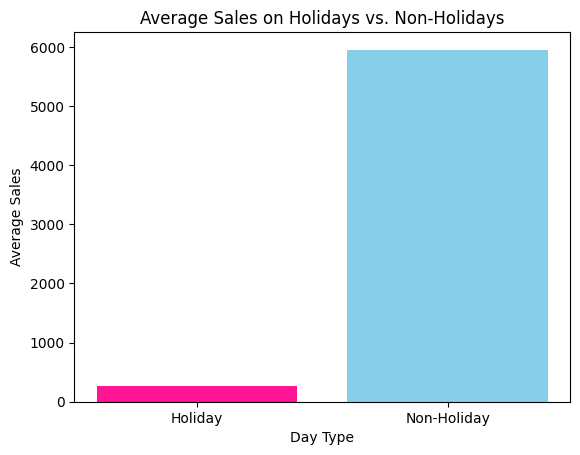

In [17]:
# Calculate the average sales on holidays and non-holidays
holiday_sales_mean = sales[sales['is_holiday'] == 1]['sales'].mean()
non_holiday_sales_mean = sales[sales['is_holiday'] == 0]['sales'].mean()

# Define colors
colors = ['#FF1493', '#87CEEB']

# Create a bar plot
plt.bar(['Holiday', 'Non-Holiday'], [holiday_sales_mean, non_holiday_sales_mean], color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.title('Average Sales on Holidays vs. Non-Holidays')
plt.show()

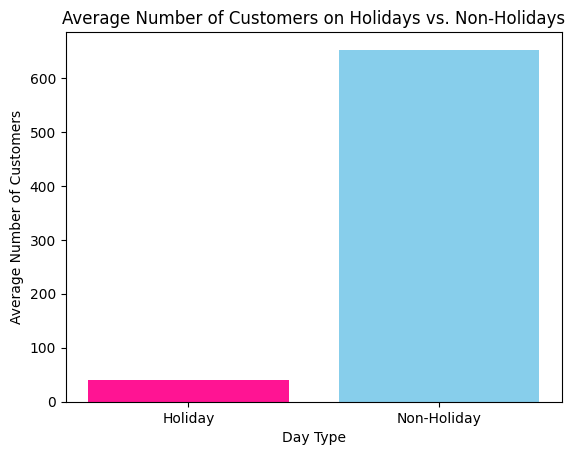

In [18]:
# Calculate the average number of customers on holidays and non-holidays
holiday_customers_mean = sales[sales['is_holiday'] == 1]['nb_customers_on_day'].mean()
non_holiday_customers_mean = sales[sales['is_holiday'] == 0]['nb_customers_on_day'].mean()

# Define colors
colors = ['#FF1493', '#87CEEB']

# Create a bar plot
plt.bar(['Holiday', 'Non-Holiday'], [holiday_customers_mean, non_holiday_customers_mean], color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Number of Customers')
plt.title('Average Number of Customers on Holidays vs. Non-Holidays')
plt.show()

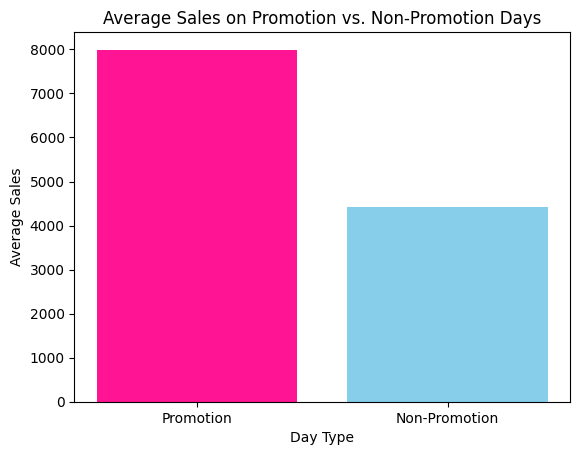

In [19]:
# Calculate the average sales on promotion days and non-promotion days
promotion_sales_mean = sales[sales['promotion'] == 1]['sales'].mean()
non_promotion_sales_mean = sales[sales['promotion'] == 0]['sales'].mean()

# Define colors
colors = ['#FF1493', '#87CEEB']

# Create a bar plot
plt.bar(['Promotion', 'Non-Promotion'], [promotion_sales_mean, non_promotion_sales_mean], color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.title('Average Sales on Promotion vs. Non-Promotion Days')
plt.show()

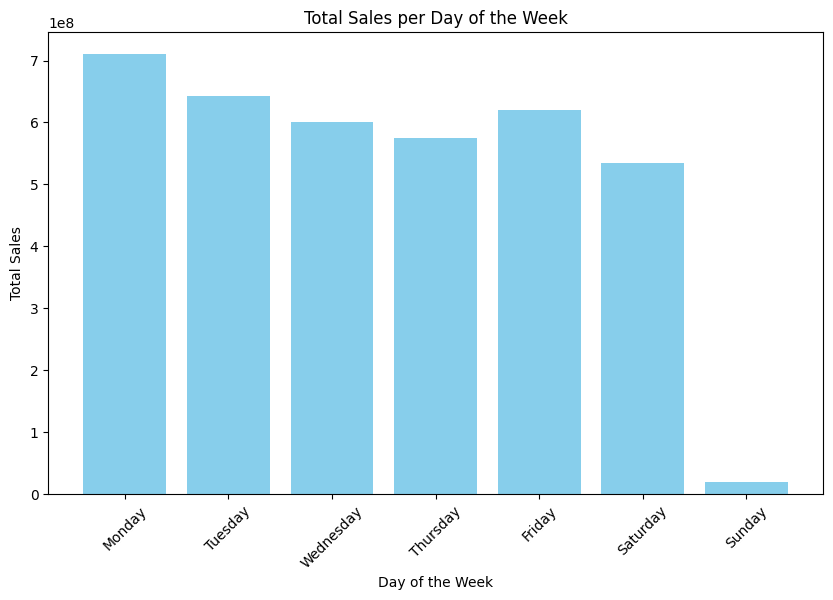

In [20]:
# Calculate total sales for each day of the week
total_sales_per_day = sales.groupby('day_of_week')['sales'].sum()

# Define the days of the week and their labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Increase the size of the plot
plt.bar(days_of_week, total_sales_per_day, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [21]:
# Create a new column indicating whether the day is Sunday (1) or not (0)
sales_transformed['is_sunday'] = (sales_transformed['day_of_week'] == 7).astype(int)

# Display the first few rows to verify
sales_transformed.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c,is_sunday
0,366,4,2013-04-18,517,1,0,0,0,4422,0,0,0,0,0
1,394,6,2015-04-11,694,1,0,0,0,8297,0,0,0,0,0
2,807,4,2013-08-29,970,1,1,0,0,9729,0,0,0,0,0
3,802,2,2013-05-28,473,1,1,0,0,6513,0,0,0,0,0
4,726,4,2013-10-10,1068,1,1,0,0,10882,0,0,0,0,0


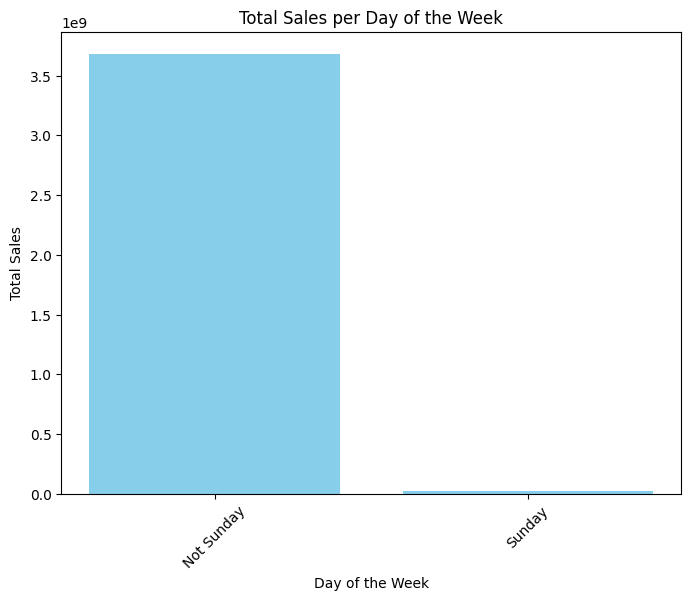

In [22]:
# Calculate total sales for each day of the week
total_sales_per_day = sales_transformed.groupby('is_sunday')['sales'].sum()

# Define the days of the week and their labels
days_of_week = ['Not Sunday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(8, 6))  # Increase the size of the plot
plt.bar(days_of_week, total_sales_per_day, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [23]:
# Create a new column indicating whether the day is Sunday (1) or not (0)
sales['is_sunday'] = (sales['day_of_week'] == 7).astype(int)

# Display the first few rows to verify
print(sales.head())

   store_ID  day_of_week        date  nb_customers_on_day  open  promotion  \
0       366            4  2013-04-18                  517     1          0   
1       394            6  2015-04-11                  694     1          0   
2       807            4  2013-08-29                  970     1          1   
3       802            2  2013-05-28                  473     1          1   
4       726            4  2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  is_holiday  is_sunday  
0             0               0   4422           0          0  
1             0               0   8297           0          0  
2             0               0   9729           0          0  
3             0               0   6513           0          0  
4             0               0  10882           0          0  


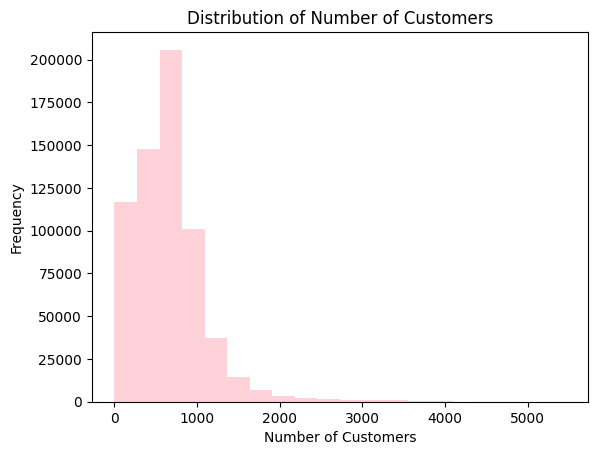

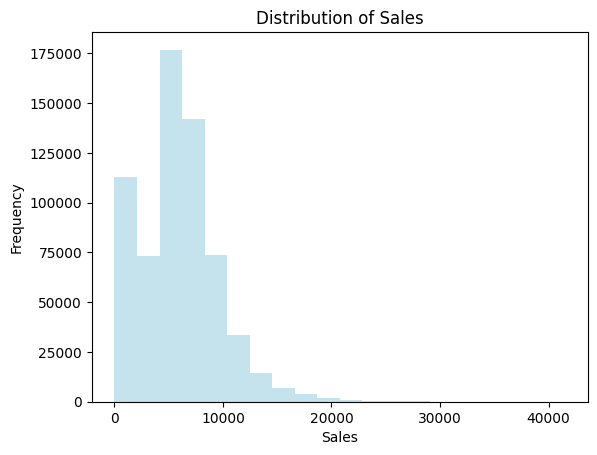

In [24]:
# Plot histogram for numeric variables
plt.hist(sales['nb_customers_on_day'], bins=20, color='pink', alpha=0.7)
plt.title('Distribution of Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()

plt.hist(sales['sales'], bins=20, color='lightblue', alpha=0.7)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [25]:
print(sales_transformed.dtypes)

store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
is_holiday                      int64
state_holiday_a                 uint8
state_holiday_b                 uint8
state_holiday_c                 uint8
is_sunday                       int64
dtype: object


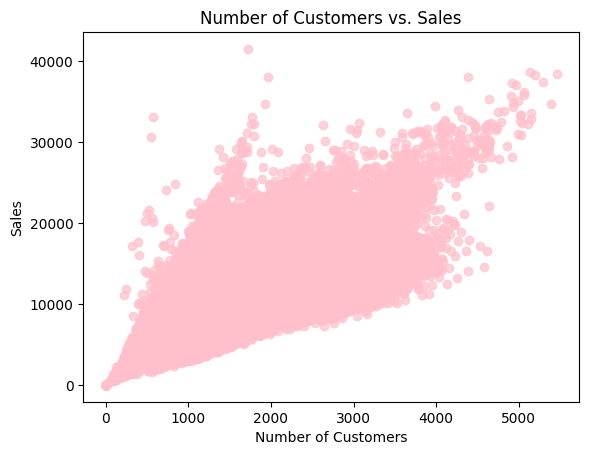

In [26]:
# Plot scatter plots for relationships between variables
plt.scatter(sales['nb_customers_on_day'], sales['sales'], color='pink', alpha=0.7)
plt.title('Number of Customers vs. Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

In [27]:
sales_transformed.columns

Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales', 'is_holiday',
       'state_holiday_a', 'state_holiday_b', 'state_holiday_c', 'is_sunday'],
      dtype='object')

In [28]:
# Remove the 'state_holiday' column
sales_transformed.drop(columns=['state_holiday'], inplace=True)

# Calculate the correlation matrix
correlation_matrix = sales_transformed.corr()

# Display the correlation matrix
print(correlation_matrix)

<ipython-input-28-abf13f5373dc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_transformed.corr()


                     store_ID  day_of_week  nb_customers_on_day      open  \
store_ID             1.000000     0.000329             0.023605 -0.001108   
day_of_week          0.000329     1.000000            -0.385616 -0.527947   
nb_customers_on_day  0.023605    -0.385616             1.000000  0.617264   
open                -0.001108    -0.527947             0.617264  1.000000   
promotion           -0.000364    -0.392736             0.315858  0.294936   
school_holiday      -0.000706    -0.206069             0.071085  0.085213   
sales                0.004804    -0.461107             0.894872  0.678463   
is_holiday           0.000503    -0.053206            -0.227339 -0.379613   
state_holiday_a      0.001005    -0.041343            -0.182142 -0.303459   
state_holiday_b      0.000016    -0.040759            -0.103493 -0.174644   
state_holiday_c     -0.000866    -0.001438            -0.083525 -0.138651   
is_sunday            0.001274     0.611562            -0.523083 -0.872404   

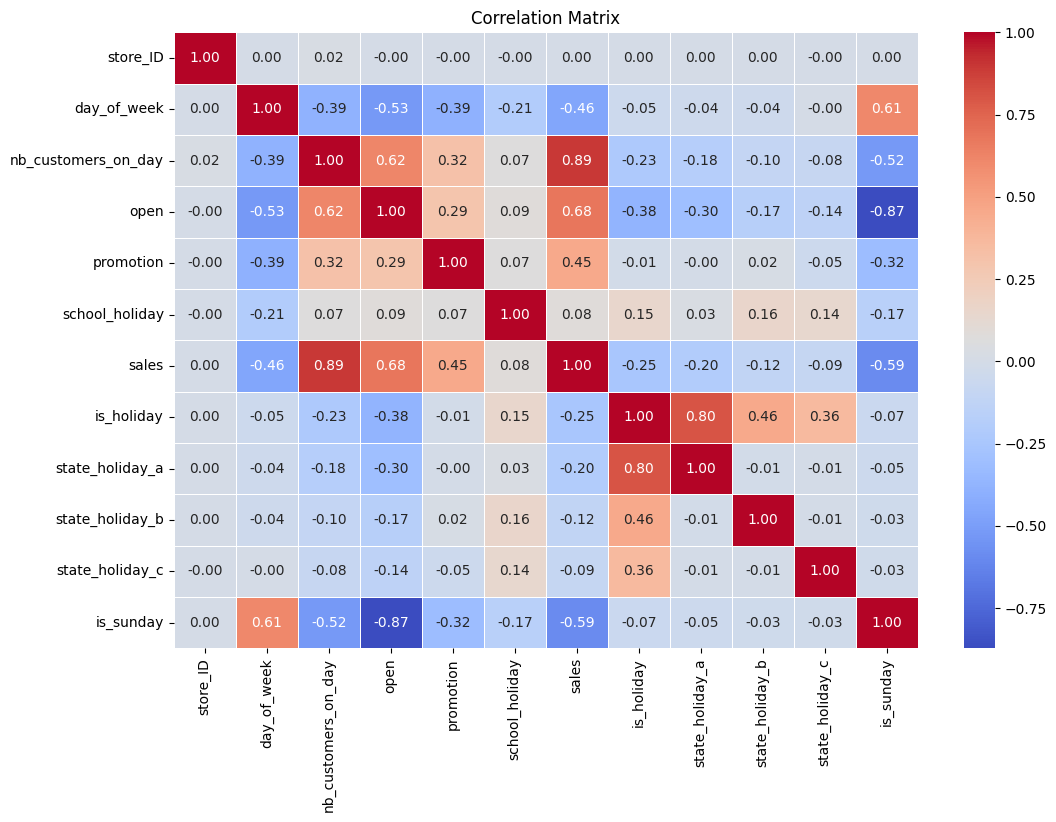

In [29]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
sales_transformed.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c,is_sunday
0,366,4,2013-04-18,517,1,0,0,4422,0,0,0,0,0
1,394,6,2015-04-11,694,1,0,0,8297,0,0,0,0,0
2,807,4,2013-08-29,970,1,1,0,9729,0,0,0,0,0
3,802,2,2013-05-28,473,1,1,0,6513,0,0,0,0,0
4,726,4,2013-10-10,1068,1,1,0,10882,0,0,0,0,0


In [31]:
sales_transformed = sales_transformed[sales_transformed['date'] != "2014-0"]

# Convert the 'date' column to datetime type
sales_transformed['date'] = pd.to_datetime(sales_transformed['date'])

# Creating a new column for the month
sales_transformed['month'] = sales_transformed['date'].dt.month
sales_transformed

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c,is_sunday,month
0,366,4,2013-04-18,517,1,0,0,4422,0,0,0,0,0,4
1,394,6,2015-04-11,694,1,0,0,8297,0,0,0,0,0,4
2,807,4,2013-08-29,970,1,1,0,9729,0,0,0,0,0,8
3,802,2,2013-05-28,473,1,1,0,6513,0,0,0,0,0,5
4,726,4,2013-10-10,1068,1,1,0,10882,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,409,6,2013-10-26,483,1,0,0,4553,0,0,0,0,0,10
640836,97,1,2014-04-14,987,1,1,0,12307,0,0,0,0,0,4
640837,987,1,2014-07-07,925,1,0,0,6800,0,0,0,0,0,7
640838,1084,4,2014-06-12,725,1,0,0,5344,0,0,0,0,0,6


In [32]:
# Select features and target variable

X = sales_transformed[['nb_customers_on_day', 'store_ID', 'promotion', 'is_holiday', 'is_sunday' , 'open']]
y = sales_transformed['sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]] = scaler.fit_transform(X_train[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]])
X_test_scaled[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]] = scaler.transform(X_test[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]])

In [33]:
X_train_scaled.columns

Index(['nb_customers_on_day', 'store_ID', 'promotion', 'is_holiday',
       'is_sunday', 'open'],
      dtype='object')

In [34]:
# # Create and train the linear regression model
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # Make predictions
# predictions = model.predict(X_test_scaled)

# # Evaluate the model performance
# r2 = r2_score(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# print("R² Score:", r2)
# print("Mean Squared Error:", mse)

In [35]:
# # Create and train the XGBoost model
# xgb_model = XGBRegressor()
# xgb_model.fit(X_train_scaled, y_train)

# # Make predictions
# xgb_predictions = xgb_model.predict(X_test_scaled)

# # Evaluate the model performance
# xgb_r2 = r2_score(y_test, xgb_predictions)
# xgb_mse = mean_squared_error(y_test, xgb_predictions)
# print("XGBoost R² Score:", xgb_r2)
# print("XGBoost Mean Squared Error:", xgb_mse)

In [36]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the performance of the Random Forest model
rf_r2 = r2_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest R² Score:", rf_r2)
print("Random Forest Mean Squared Error:", rf_mse)

Random Forest R² Score: 0.9728068602681728
Random Forest Mean Squared Error: 401959.78189405525


In [37]:
# # Create and train the Gradient Boosting model
# gb_model = GradientBoostingRegressor(random_state=42)
# gb_model.fit(X_train_scaled, y_train)

# # Make predictions
# gb_predictions = gb_model.predict(X_test_scaled)

# # Evaluate the performance of the Gradient Boosting model
# gb_r2 = r2_score(y_test, gb_predictions)
# gb_mse = mean_squared_error(y_test, gb_predictions)
# print("Gradient Boosting R² Score:", gb_r2)
# print("Gradient Boosting Mean Squared Error:", gb_mse)

In [38]:
import pickle

pickle.dump(rf_model, open('random_forest_model.pkl', 'wb'))

In [54]:
validation = pd.read_csv("validation.csv")

In [55]:
validation

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,26/10/2014,0,0,0,0,0
71201,687449,377,7,18/08/2013,0,0,0,0,0
71202,207393,15,3,11/06/2014,648,1,0,0,0
71203,233378,950,2,23/04/2013,626,1,1,0,0


In [56]:
validation.columns

Index(['index', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday'],
      dtype='object')

In [57]:
sales_transformed.columns

Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'school_holiday', 'sales', 'is_holiday', 'state_holiday_a',
       'state_holiday_b', 'state_holiday_c', 'is_sunday', 'month'],
      dtype='object')

In [58]:
validation['is_sunday'] = (validation['day_of_week'] == 7).astype(int)

In [59]:
# Define the function to assign values to the is_holiday column
def is_holiday(row):
    if row['state_holiday'] == '0':
        return 0
    else:
        return 1

# Apply the function to the state_holiday column to create the is_holiday column
validation['is_holiday'] = validation.apply(is_holiday, axis=1)

# Check the first few records to ensure the column was added correctly
display(validation.head())

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,is_sunday,is_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0,1,0
1,558468,27,7,29/12/2013,0,0,0,0,0,1,0
2,76950,404,3,19/03/2014,657,1,1,0,0,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0,0,0


In [60]:
# Convert 'date' column to datetime
validation['date'] = pd.to_datetime(validation['date'])

# Check the first few rows to verify the conversion
display(validation.head())

<ipython-input-60-a0366a6cd07c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  validation['date'] = pd.to_datetime(validation['date'])


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,is_sunday,is_holiday
0,272371,415,7,2015-01-03,0,0,0,0,0,1,0
1,558468,27,7,2013-12-29,0,0,0,0,0,1,0
2,76950,404,3,2014-03-19,657,1,1,0,0,0,0
3,77556,683,2,2013-01-29,862,1,0,0,0,0,0
4,456344,920,3,2014-03-19,591,1,1,0,0,0,0


In [61]:
validation_index = validation["index"]

In [62]:
validation.drop(['index', 'day_of_week', "date",'state_holiday', 'school_holiday'], axis=1, inplace=True)
display(validation)

,store_ID,nb_customers_on_day,open,promotion,is_sunday,is_holiday
0,415,0,0,0,1,0
1,27,0,0,0,1,0
2,404,657,1,1,0,0
3,683,862,1,0,0,0
4,920,591,1,1,0,0
...,...,...,...,...,...,...
71200,441,0,0,0,1,0
71201,377,0,0,0,1,0
71202,15,648,1,0,0,0
71203,950,626,1,1,0,0


In [63]:
validation.columns

Index(['store_ID', 'nb_customers_on_day', 'open', 'promotion', 'is_sunday',
       'is_holiday'],
      dtype='object')

In [64]:
sales_transformed.columns

Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'school_holiday', 'sales', 'is_holiday', 'state_holiday_a',
       'state_holiday_b', 'state_holiday_c', 'is_sunday', 'month'],
      dtype='object')

In [65]:
'nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open'

# Make predictions on the new data
validation[['nb_customers_on_day', 'promotion', 'is_holiday', 'is_sunday', 'open']] =scaler.transform(validation[['nb_customers_on_day', 'promotion', 'is_holiday', 'is_sunday', 'open']])
sales_predictions = rf_model.predict(validation[['nb_customers_on_day', 'store_ID', 'promotion', 'is_holiday','is_sunday', 'open']])

# Optionally, you can print or further process the predicted sales
print("Predicted sales:", sales_predictions)



Predicted sales: [   0.            0.         5399.9025     ... 5946.70333333 6482.44535714
 8590.35916667]


In [66]:
X_train_scaled.columns

Index(['nb_customers_on_day', 'store_ID', 'promotion', 'is_holiday',
       'is_sunday', 'open'],
      dtype='object')

In [67]:
validation['sales_pred']= sales_predictions

In [68]:
validation

,store_ID,nb_customers_on_day,open,promotion,is_sunday,is_holiday,sales_pred
0,415,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000
1,27,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000
2,404,0.050621,0.452212,1.272521,-0.407185,-0.177617,5399.902500
3,683,0.492306,0.452212,-0.785842,-0.407185,-0.177617,8466.123714
4,920,-0.091581,0.452212,1.272521,-0.407185,-0.177617,6289.180000
...,...,...,...,...,...,...,...
71200,441,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000
71201,377,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000
71202,15,0.031230,0.452212,-0.785842,-0.407185,-0.177617,5946.703333
71203,950,-0.016171,0.452212,1.272521,-0.407185,-0.177617,6482.445357


In [69]:
validation['index']= validation_index

In [70]:
validation

,store_ID,nb_customers_on_day,open,promotion,is_sunday,is_holiday,sales_pred,index
0,415,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000,272371
1,27,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000,558468
2,404,0.050621,0.452212,1.272521,-0.407185,-0.177617,5399.902500,76950
3,683,0.492306,0.452212,-0.785842,-0.407185,-0.177617,8466.123714,77556
4,920,-0.091581,0.452212,1.272521,-0.407185,-0.177617,6289.180000,456344
...,...,...,...,...,...,...,...,...
71200,441,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000,59062
71201,377,-1.364927,-2.211351,-0.785842,2.455887,-0.177617,0.000000,687449
71202,15,0.031230,0.452212,-0.785842,-0.407185,-0.177617,5946.703333,207393
71203,950,-0.016171,0.452212,1.272521,-0.407185,-0.177617,6482.445357,233378


In [73]:
Results = validation[["sales_pred", "index"]]
Results


,sales_pred,index
0,0.000000,272371
1,0.000000,558468
2,5399.902500,76950
3,8466.123714,77556
4,6289.180000,456344
...,...,...
71200,0.000000,59062
71201,0.000000,687449
71202,5946.703333,207393
71203,6482.445357,233378


In [74]:
Results.to_csv('Hugging_face.csv', index=False)